In [68]:
import cv2
import time
import numpy as np
import math

protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
nPoints2 = 12
POSE_PAIRS2 = [ [1,2],[2,3],[3,4],[5,8],[9,12],[13,16],[17,20] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [109]:
img = cv2.imread("./rajit7.jpg")
frame = cv2.resize(img,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)


In [110]:
#frame = cv2.imread("./ra2.jpg")
frameCopy = np.copy(frame)
frameCopy2 = np.copy(frame)

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.08

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 1.598


In [111]:
#frame = cv2.imread("./rajit5.jpg")
#frame = cv2.resize(frame,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
#frame = cv2.imread("./ra2.jpg")
dst = cv2.fastNlMeansDenoisingColored(frame,None,3,3,7,21)
hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

lower = np.array([80,0,0])  #-- Lower range --
upper = np.array([180,200,255])  #-- Upper range --
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(dst, dst, mask= mask)


maskedFrameOutline= np.copy(frameCopy)

idx = 0
for val in mask:
    ids =0
    for v in val:
        a=[]
        if v == 255:
            a =[255,255,255]
        else:
            a =frame[idx][ids]
        maskedFrameOutline[idx][ids] =a
        ids+=1
    idx+=1
cv2.imshow('maskedFrame',maskedFrameOutline)
#-- Contains pixels having the gray color--
edges = cv2.Canny(maskedFrameOutline,150,120) 
cv2.imshow('mask',edges)
#plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()



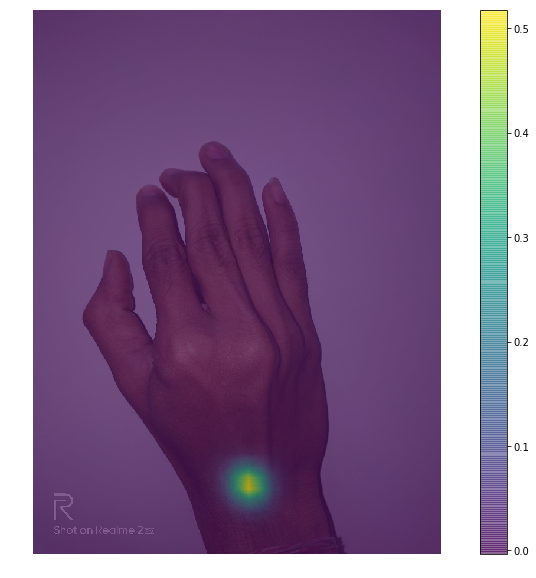

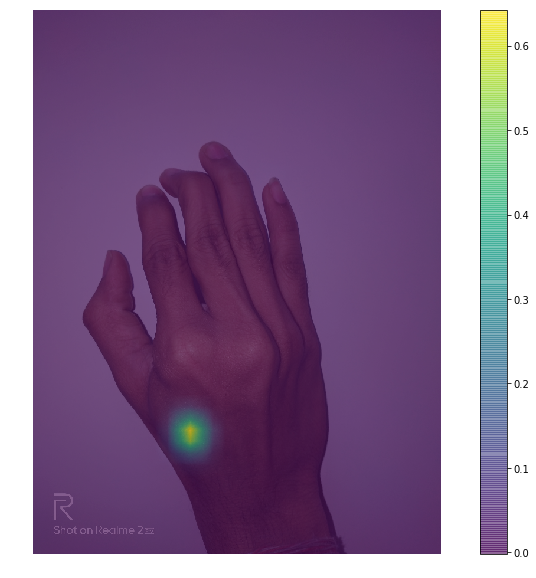

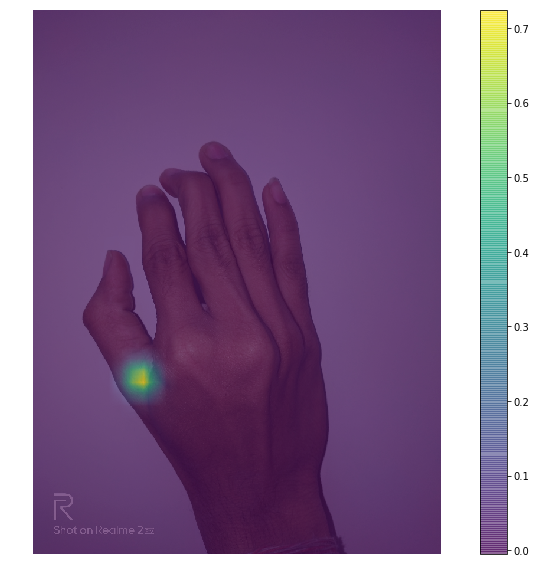

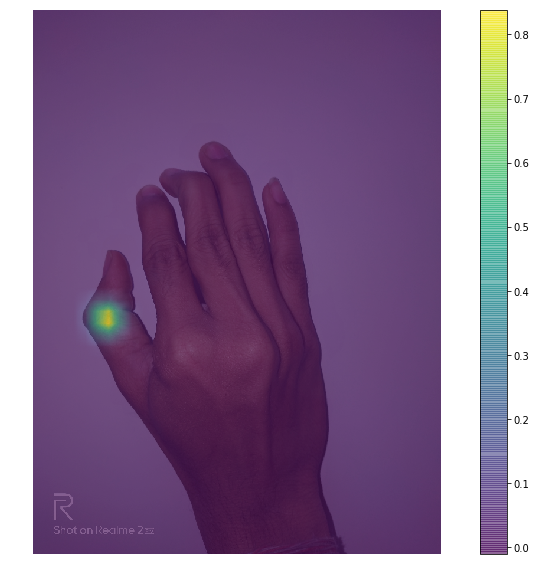

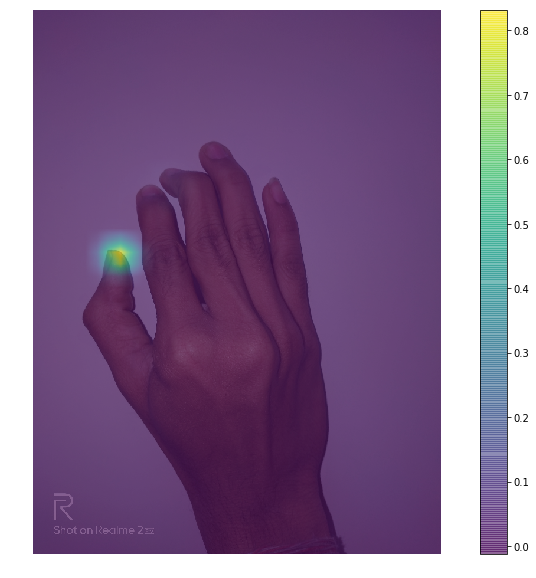

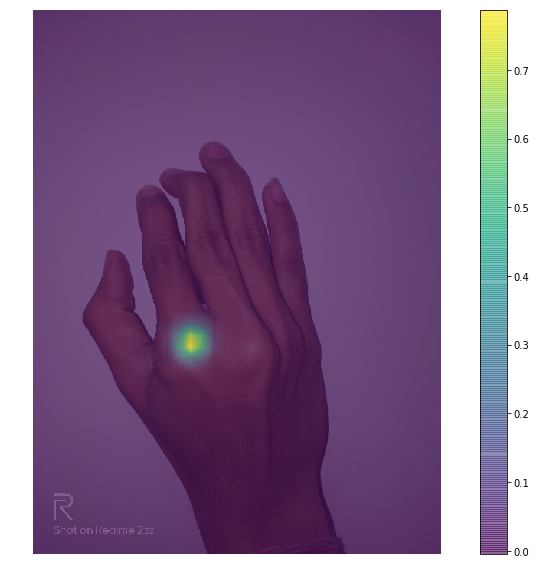

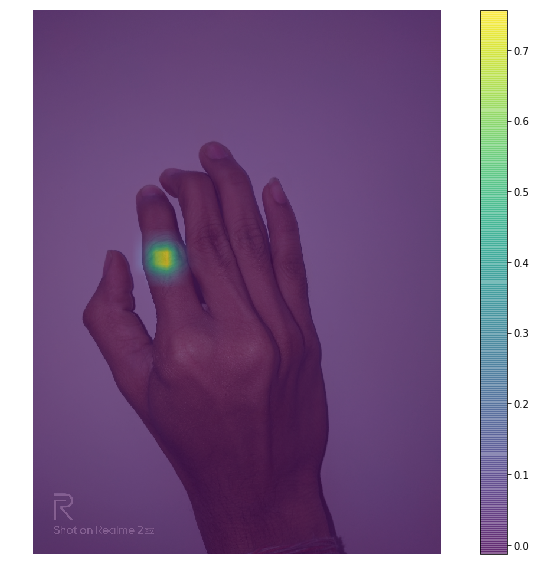

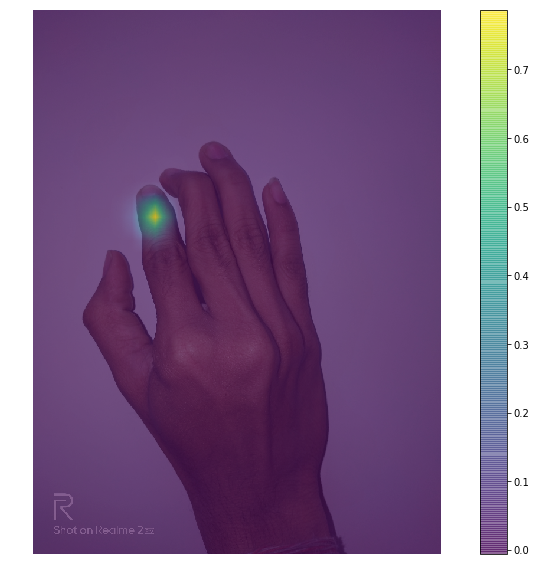

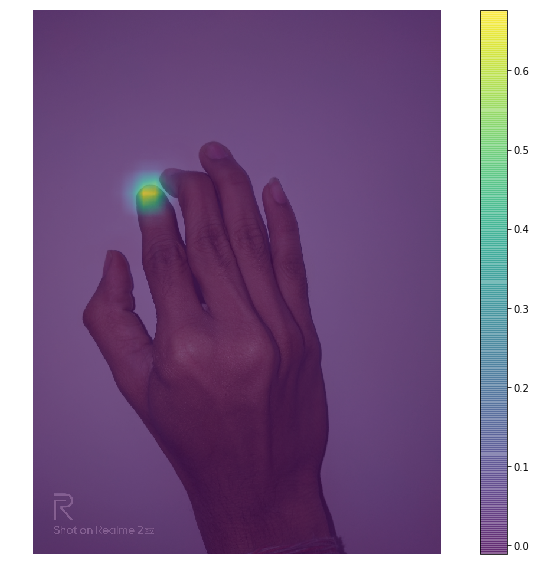

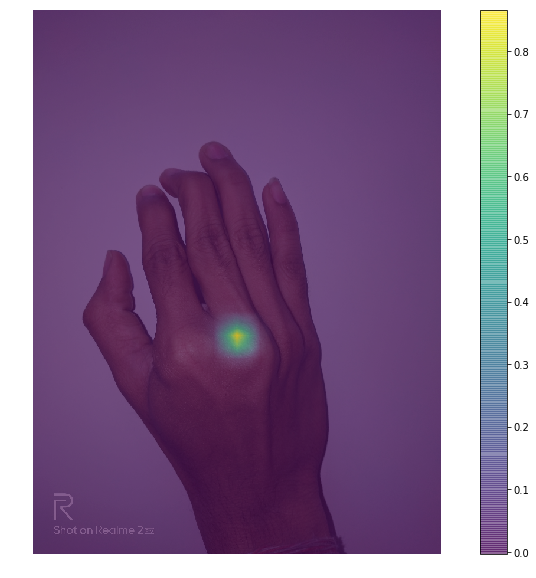

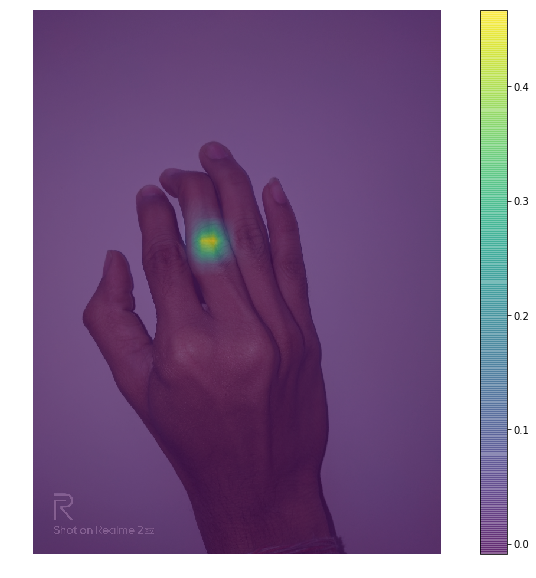

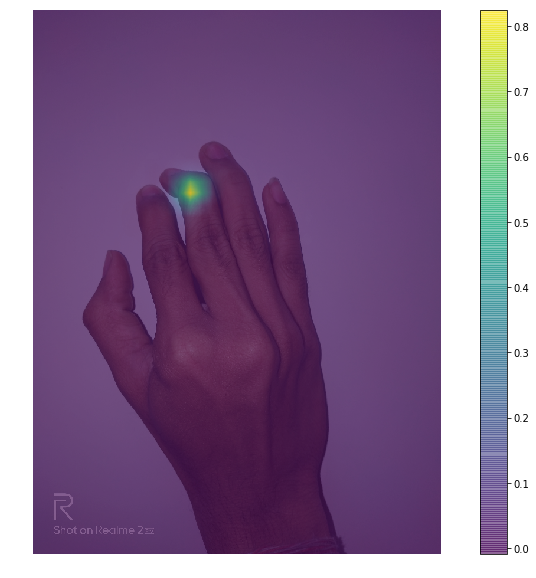

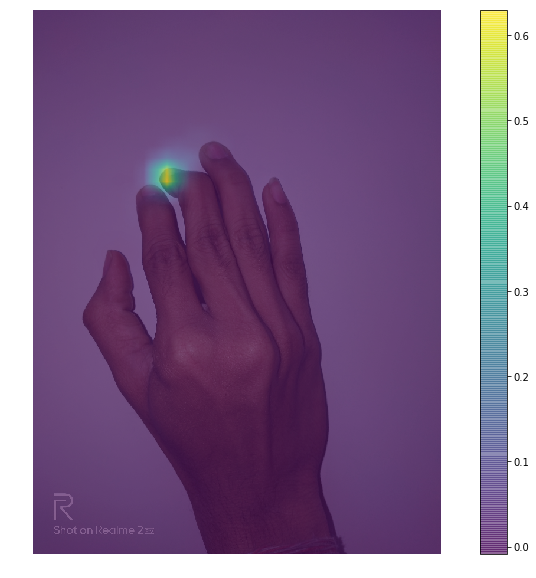

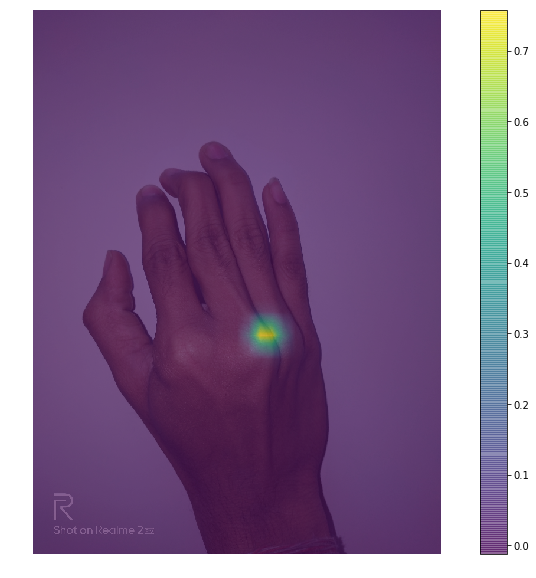

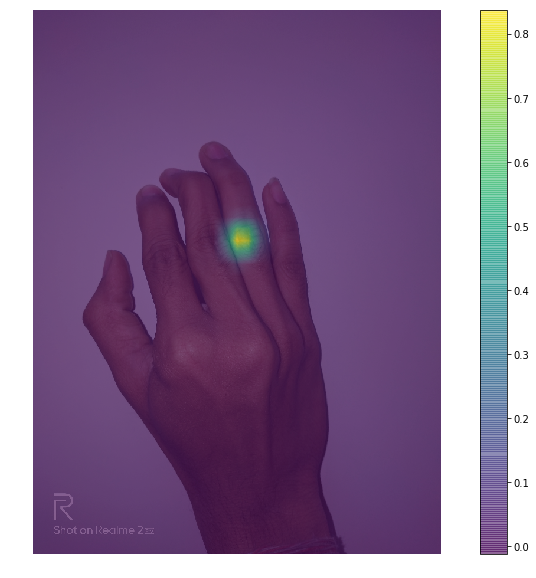

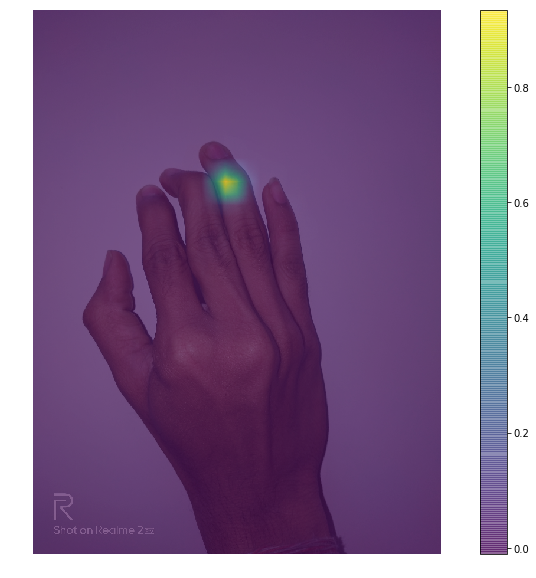

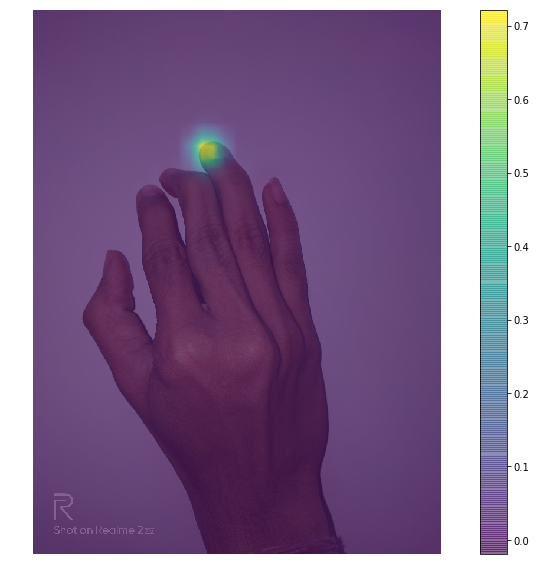

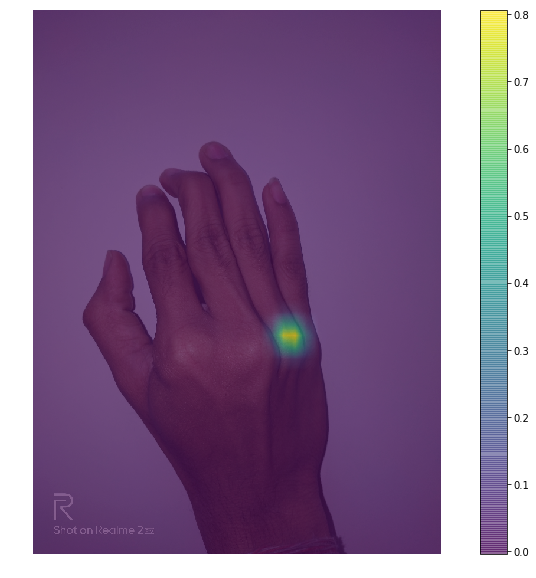

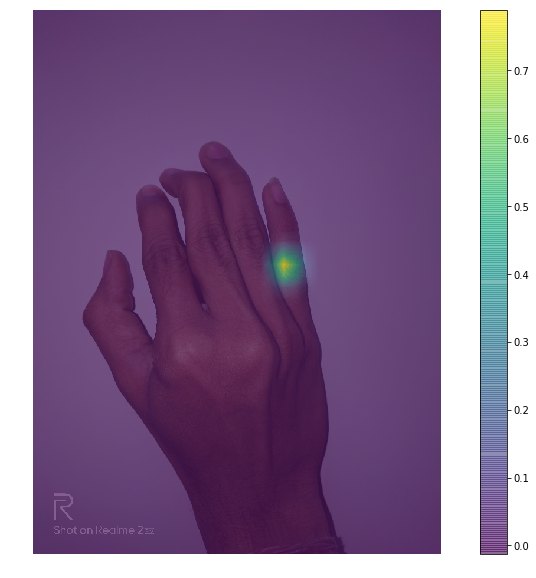

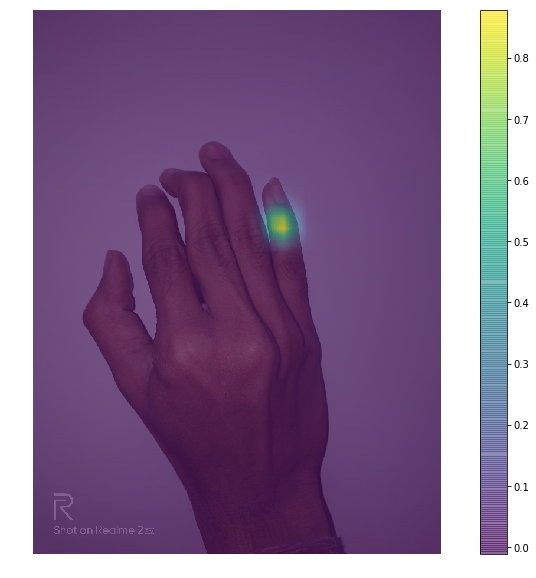

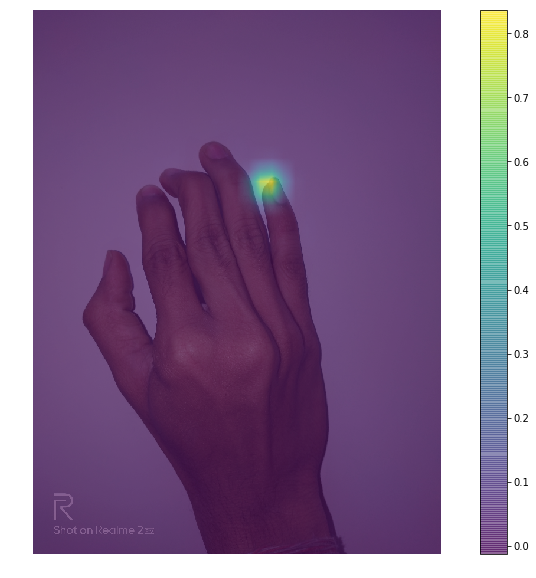

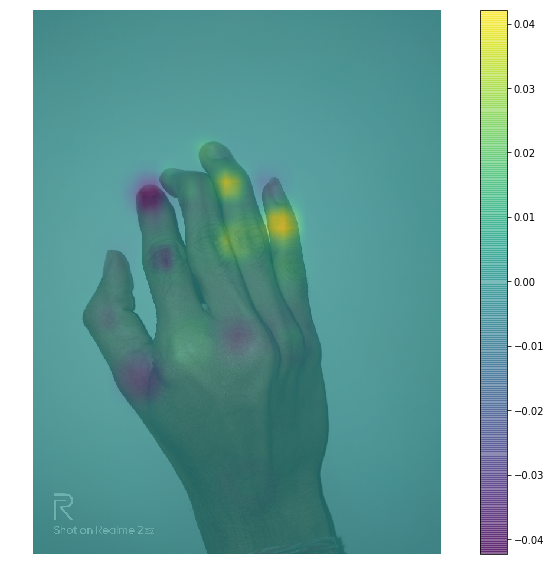

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(22):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    plt.figure(figsize=[14,10])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    plt.colorbar()
    plt.axis("off")

part A  (365, 811)  part B  (266, 711)
part A  0  part B  1
part A  (266, 711)  part B  (187, 631)
part A  1  part B  2
part A  (187, 631)  part B  (128, 530)
part A  2  part B  3
part A  (128, 530)  part B  (147, 411)
part A  3  part B  4
part A  (365, 811)  part B  (266, 570)
part A  0  part B  5
part A  (266, 570)  part B  (226, 430)
part A  5  part B  6
part A  (226, 430)  part B  (207, 350)
part A  6  part B  7
part A  (207, 350)  part B  (187, 310)
part A  7  part B  8
part A  (365, 811)  part B  (345, 551)
part A  0  part B  9
part A  (345, 551)  part B  (305, 390)
part A  9  part B  10
part A  (305, 390)  part B  (266, 310)
part A  10  part B  11
part A  (266, 310)  part B  (227, 290)
part A  11  part B  12
part A  (365, 811)  part B  (385, 551)
part A  0  part B  13
part A  (385, 551)  part B  (345, 390)
part A  13  part B  14
part A  (345, 390)  part B  (325, 290)
part A  14  part B  15
part A  (325, 290)  part B  (286, 230)
part A  15  part B  16
part A  (365, 811)  part B  

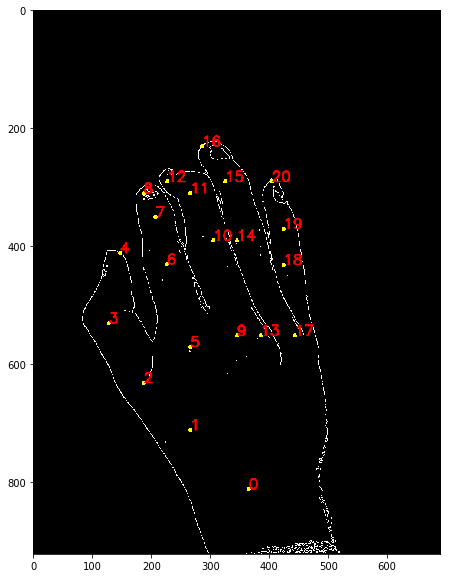

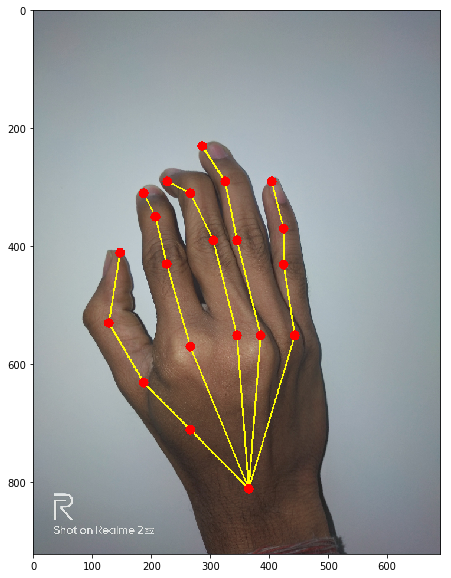

In [89]:
# Empty list to store the detected keypoints
maskedFrame= frameCopy

idx = 0
for val in edges:
    ids =0
    for v in val:
        a=[]
        if v == 255:
            a =[255,255,255]
        else:
            a =[0,0,0]
        maskedFrame[idx][ids] =a
        ids+=1
    idx+=1
maskedFrameCopy = np.copy(maskedFrame)
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(maskedFrame, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(maskedFrame, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        print('part A ', points[partA] , ' part B ' ,points[partB])
        print('part A ', partA , ' part B ' ,partB)
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(maskedFrame, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite('Output-Keypoints.jpg', maskedFrame)
cv2.imwrite('Output-Skeleton.jpg', frame)

        
#cv2.imshow('mask ',maskedFrame)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Total time taken : {:.3f}".format(time.time() - t))

In [167]:
color = maskedFrameCopy[831,365]
print(color)
if color[0] == 255 and color[1] == 255 and color[2] == 255:
    print('yes')
cv2.imshow('mask ',maskedFrameCopy)
cv2.waitKey(0)
cv2.destroyAllWindows()

[0 0 0]


In [114]:
maskedFrame= frameCopy

idx = 0
for val in edges:
    ids =0
    for v in val:
        a=[]
        if v == 255:
            a =[255,255,255]
        elif maskedFrameOutline[idx][ids][0] == 255 and maskedFrameOutline[idx][ids][1] == 255 and maskedFrameOutline[idx][ids][2] == 255:
             a =[255,255,255]
        else:
            a =[0,0,0]
        maskedFrame[idx][ids] =a
        ids+=1
    idx+=1
maskedFrameCopy = np.copy(maskedFrame)


roiKnuckles= [[4,3,2],[7,6,5],[11,10,9],[15,14,13],[19,18,17],[8,7,6],[12,11,10],[16,15,14],[20,19,18]]
roiPoints =[]
roiPointsCopy = []
for val in roiKnuckles:
    gap = points[val[1]][1] - int((points[val[0]][1]+points[val[1]][1])/2) 
    myradiansA = math.atan2(points[val[0]][1]-points[val[1]][1], points[val[0]][0]-points[val[1]][0])
    slopeA = math.degrees(myradiansA)
    myradiansB = math.atan2(points[val[1]][1]-points[val[2]][1], points[val[1]][0]-points[val[2]][0])
    slopeB = math.degrees(myradiansB)
    a = [(int((points[val[0]][0]+points[val[1]][0])/2),points[val[1]][1] - gap,slopeA),(points[val[1]][0],points[val[1]][1],slopeA),(int((points[val[2]][0]+points[val[1]][0])/2),points[val[1]][1] +gap,slopeB)]
    b = [(int((points[val[0]][0]+points[val[1]][0])/2),points[val[1]][1] - gap),(points[val[1]][0],points[val[1]][1]),(int((points[val[2]][0]+points[val[1]][0])/2),points[val[1]][1] +gap)]
    roiPoints.append(a)
    roiPointsCopy.append(b)
print(roiPoints)


    
for coords in roiPoints:
    for val in coords:
        totalcount=0
        countright = 0 
        col = maskedFrameCopy[val[1],val[0]]
        while col[0] == 0 and col[1] == 0 and col[2] == 0:
            countright+=1
            #print('val[2] ',val[2])
            radianSlope = math.radians(val[2]-90)
            #print('radianSlope ',radianSlope)
            x= val[0]+countright
            y = (countright * math.tan(radianSlope)) + val[1]
            #print('y  ',y )
            color = maskedFrameCopy[int(y),x]
            col = np.copy(color)
            cv2.circle(maskedFrameCopy, (x-1,int(y)), 1, (0, 255, 255), thickness=-2, lineType=cv2.FILLED)
            #print('color ',col)
            
        countleft = 1 
        col2 = maskedFrameCopy[val[1],val[0]-2]
        
        while col2[0] == 0 and col2[1] == 0 and col2[2] == 0:
            countleft+=1
            radianSlope = math.radians(val[2]-90)
            x= val[0]-countleft
            y = -(countleft * math.tan(radianSlope)) + val[1]
            #print('y  ',y )
            color = maskedFrameCopy[int(y),x]
            col2 = np.copy(color)
            cv2.circle(maskedFrameCopy, (x+2,int(y)), 1, (0, 255, 255), thickness=-2, lineType=cv2.FILLED)
        
            
        totalcount = countright+ countleft
        print('countright ',countright,' countleft ',countleft,' totalcount ',totalcount)
        
for coords in roiPointsCopy:
    coordA = coords[0]
    coordB = coords[1]
    coordC = coords[2]
    cv2.circle(maskedFrameCopy, coordA, 3, (0, 0, 255), thickness=-2, lineType=cv2.FILLED)
    cv2.circle(maskedFrameCopy, coordB, 3, (0,255, 0), thickness=-2, lineType=cv2.FILLED)
    cv2.circle(maskedFrameCopy, coordC, 3, (0, 0, 255), thickness=-2, lineType=cv2.FILLED)
        

cv2.imshow('mask ',maskedFrameCopy)
cv2.imshow('frame ',frame)
cv2.imshow('edges ',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()   


[[(137, 470, -80.92850242282283), (128, 530, -80.92850242282283), (157, 590, -120.29169610031725)], [(216, 390, -103.36021844476448), (226, 430, -103.36021844476448), (246, 470, -105.94539590092286)], [(285, 350, -115.989233583833), (305, 390, -115.989233583833), (325, 430, -103.95247776808495)], [(335, 340, -101.30993247402021), (345, 390, -101.30993247402021), (365, 440, -103.95247776808495)], [(424, 400, -90.0), (424, 431, -90.0), (433, 462, -98.99714342106506)], [(197, 330, -116.56505117707799), (207, 350, -116.56505117707799), (216, 370, -103.36021844476448)], [(246, 300, -152.85031830221683), (266, 310, -152.85031830221683), (285, 320, -115.989233583833)], [(305, 260, -123.02386755579664), (325, 290, -123.02386755579664), (335, 320, -101.30993247402021)], [(414, 330, -104.03624346792648), (424, 370, -104.03624346792648), (424, 410, -90.0)]]
countright  30  countleft  27  totalcount  57
countright  61  countleft  45  totalcount  106
countright  142  countleft  28  totalcount  170


part A  (266, 711)  part B  (187, 631)
part A  1  part B  2
part A  (187, 631)  part B  (128, 530)
part A  2  part B  3
part A  (128, 530)  part B  (147, 411)
part A  3  part B  4
part A  (266, 570)  part B  (187, 310)
part A  5  part B  8
part A  (345, 551)  part B  (227, 290)
part A  9  part B  12
part A  (385, 551)  part B  (286, 230)
part A  13  part B  16
part A  (443, 551)  part B  (404, 290)
part A  17  part B  20
distance  102.43220179290273
Total time taken : 316.256


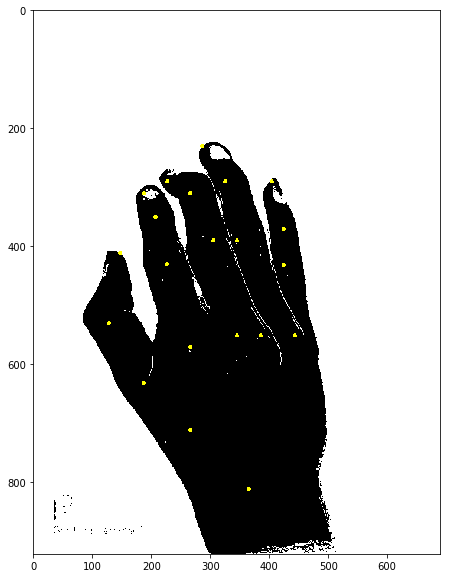

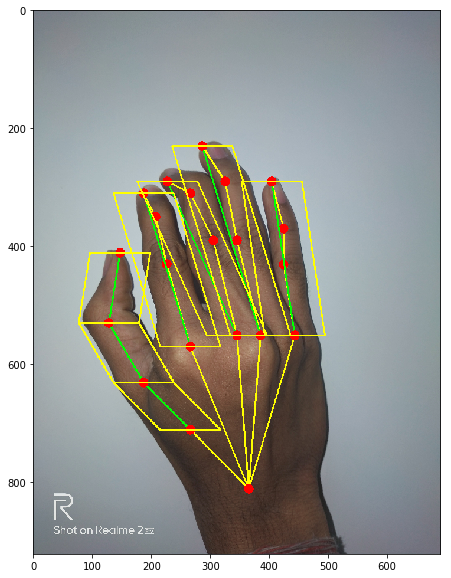

In [91]:
# Empty list to store the detected keypoints
points = []
knuckels= []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        #cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS2:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        print('part A ', points[partA] , ' part B ' ,points[partB])
        print('part A ', partA , ' part B ' ,partB)
        knuckels.append(points[partA])
        cv2.line(frame, points[partA], points[partB], (0, 255, 0), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        
distance = np.sqrt(np.square(knuckels[1][0] - knuckels[0][0]) + np.square(knuckels[1][1] - knuckels[0][1]))
distance = distance- 10
print('distance ',distance)

for pair in POSE_PAIRS2:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        #cv2.rectangle(frame, (int(points[partB][0]-distance/2),points[partB][1]), (int(points[partA][0]+distance/2),points[partA][1]), (0, 255, 0), 2)
        #print(points[partA][0]-distance/2 , points[partA][1])
        #print(points[partB][0]+distance/2 , points[partB][1])
        cv2.line(frame, (points[partA][0] - int(distance/2),points[partA][1]), (points[partB][0] - int(distance/2),points[partB][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partB][0] - int(distance/2),points[partB][1]), (points[partB][0] + int(distance/2),points[partB][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partB][0] + int(distance/2),points[partB][1]), (points[partA][0] + int(distance/2),points[partA][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partA][0] + int(distance/2),points[partA][1]), (points[partA][0] - int(distance/2),points[partA][1]), (0, 255, 255), 2)
        
hsv = cv2.cvtColor(frameCopy2,cv2.COLOR_BGR2HSV)
        
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))





cv2.imwrite('Output-Keypoints.jpg', frameCopy)
cv2.imwrite('Output-Skeleton.jpg', frame)







print("Total time taken : {:.3f}".format(time.time() - t))